# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [46]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [47]:
data = pd.read_csv('../data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [48]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


Видим, что в данных отсутствуют пропуски и каждый из признаков изменяется в различных диапазонах: например, Por лежит в диапазоне от 6.55 до 23.55, а TOC — от -0.19 до 2.18.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг матрицы корреляции равен:  8
Определитель матрицы корреляции равен:  0.0007299388072652095


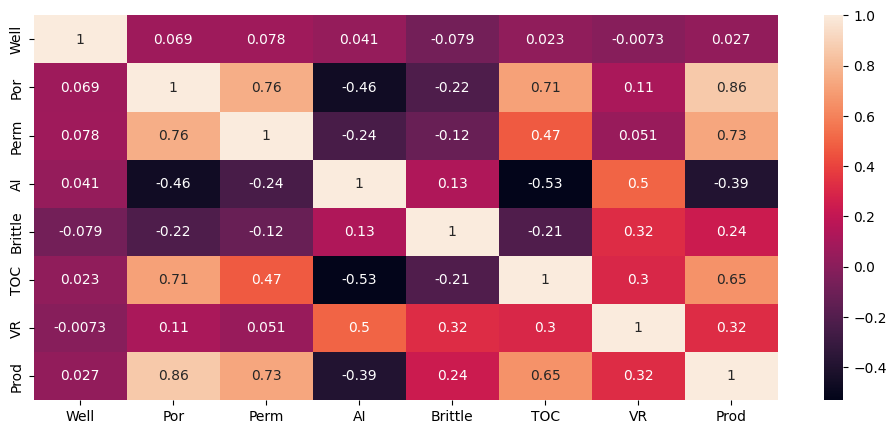

In [49]:
matr_corr = data.corr()
#display(matr_corr)
fig = plt.figure(figsize=(12, 5))
sns.heatmap(matr_corr, annot=True);
print('Ранг матрицы корреляции равен: ', np.linalg.matrix_rank(matr_corr))
print('Определитель матрицы корреляции равен: ', np.linalg.det(matr_corr))


* Наиболее сильная корреляция с целевой переменной Prod наблюдается у таких факторов как пористость скважины Por (коэффициент 0,86) и проницаемость скважины Perm (коэффициент 0.73).
* Определитель матрицы корреляции близок к нулю, это значит что она является плохо обусловленной (близкой к вырожденной).
* Чистой коллинеарности между факторами нет. Но, т.к. матрица корреляций имеет максимальный ранг (8) и при этом практически вырождена, то мы можем говорить о мультиколлинеарности факторов.
* Модель линейной регрессии может быть применена в данном случае, т.к. мультиколлинеарность не оказывает прямого влияния на точность модели сама по себе, но при этом необходимо внимательно отнестись к интерпретации результатов рассматриваемой модели. 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [50]:
from sklearn.model_selection import train_test_split #сплитование выборки

X = data.drop(['Prod'], axis=1) 
y = data[['Prod']]

# Разделим данные на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

print(X.columns)
A=np.column_stack((np.ones(X_train.shape[0]), X_train)) # A - матрица наблюдений
# вычислим OLS-оценку для коэффициентов
w = np.linalg.inv(A.T@A)@A.T@y_train
print(w.values.astype(int))

Index(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], dtype='object')
[[-1255]
 [    0]
 [  239]
 [  105]
 [ -339]
 [   25]
 [  -90]
 [  718]]


* Влияние фактора Well (идентификатор скважины), не оказывает влияния на целевую переменную Prod, т.к. коэффициент $ w_1 $ = 0. 
* Добыча газа в сутки (Prod) упадет на 339 млн. кубических футов, если акустический импеданс (AI) увеличится на единицу измерения ($ кг/м^2*10^6 $) и при этом не изменятся другие факторы. 
* Добыча газа в сутки (Prod) увеличится на 25 млн. кубических футов, если коэффициент хрупкости скважины (Brittle) увеличится на 1% и при этом не изменится влияние других факторов. 

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [51]:
from sklearn import metrics
Well=106.0
Por=15.32
Per=3.71
AI=3.29
Brittle=55.99
TOC=1.35
VR=2.42
 
new=np.array([[1,Well,Por,Per,AI,Brittle,TOC,VR]])
pred = (new@w).values
print('prediction:', pred)
print('Абсолютная ошибка предсказания:', np.abs(pred-4748.315024))

y_pred_train = np.dot(A,w)

print('MARE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_pred_train)))
print('R2_score : {:.3f}'.format(metrics.r2_score(y_train, y_pred_train)))

# Создаем массивы для составления сводной таблицы
m_t=np.array([0,0,0,0,0,0,0], float)
r2_t=np.array([0,0,0,0,0,0,0], float)
m_v=np.array([None,None,0,0,0,0,0], float)
r2_v=np.array([None,None,0,0,0,0,0], float)

m_t[0]=metrics.mean_absolute_percentage_error(y_train, y_pred_train)*100
r2_t[0]=metrics.r2_score(y_train, y_pred_train)


prediction: [[4717.12947522]]
Абсолютная ошибка предсказания: [[31.18554878]]
MARE: 0.036
R2_score : 0.960


* Метрика MARE = 0.036 говорит нам о том, что абсолютная ошибка составляет 3.6%.
* R2 = 0.96 - доля объясняемой информации (дисперсии), которую улавливает модель. R2>0.5 - хороший показатель для модели.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [52]:
# Ваш код здесь

Фактор TOC (общий органический углерод) имеет отрицательный коэффициент в модели линейной регрессии (-90), а корреляционный коэффициаент этого фактора с целевой переменной - положительный и равен 0.65. Это связано с мультиколлинеарностью факторов, которая в свою очередь приводит к неустойчивости коэффициентов линейной регрессии. Что мы и наблюдаем в нашем случае, - коэффициент сменил знак.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [53]:
X = X.drop(['Perm', 'TOC', 'Well'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

A=np.column_stack((np.ones(X_train.shape[0]), X_train))
print(X.columns)

# вычислим OLS-оценку для коэффициентов
w = np.linalg.inv(A.T@A)@A.T@y_train
print(w.values.astype(int))

y_pred_train = np.dot(A,w)
print('MARE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_pred_train)))
print('R2_score: {:.3f}'.format(metrics.r2_score(y_train, y_pred_train)))
m_t[1]=metrics.mean_absolute_percentage_error(y_train, y_pred_train)*100
r2_t[1]=metrics.r2_score(y_train, y_pred_train)

Index(['Por', 'AI', 'Brittle', 'VR'], dtype='object')
[[-1753]
 [  293]
 [ -181]
 [   27]
 [  453]]
MARE: 0.039
R2_score: 0.949


* Коэффициенты, полученные после удаления факторов и построения модели линейной регрессии можно проинтерпретировать следующим образом: добыча газа в сутки (Prod) упадет на 181 млн. кубических футов, если акустический импеданс (AI) увеличится на единицу измерения ($ кг/м^2*10^6 $) и при этом не изменятся другие факторы. Значение коэффициента уменьшилось (по модулю) по сравнению со значением этого же коэффициента, полученного ранее в п. 5.2
* Добыча газа в сутки (Prod) увеличится на 27 млн. кубических футов, если коэффициент хрупкости скважины (Brittle) увеличится на 1% и при этом не изменится влияние других факторов. Значение коэффициента увеличилось по сравнению со значением этого же коэффициента, полученного ранее в п. 5.2
* Метрика MARE увеличилась до 3.9%, т.е. произошло ухудшение предсказания модели линейной регрессии после исключения неинформативных и линейно зависимых факторов. Значение R2=0.949 так же ухудшилось по сравнению со значением из пункта 5.4.
* Противоречия коэффициентов линейной регрессии и коэффициентов корреляции больше не наблюдается.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [54]:
from sklearn.linear_model import LinearRegression

# создаём модель линейной регрессии
model_lr = LinearRegression(fit_intercept=False)  
# вычисляем коэффициенты регрессии
model_lr.fit(A, y_train)
print('w:', model_lr.coef_.astype(int))
y_pred_train = model_lr.predict(A)

A_test=np.column_stack((np.ones(X_test.shape[0]), X_test))
y_pred_test = model_lr.predict(A_test)

print('MARE (на тренировочных данных): {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_pred_train)))
print('R2 score (на тренировочных данных): {:.3f}'.format(metrics.r2_score(y_train, y_pred_train)))
print('MARE (на тестовых данных): {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred_test)))
print('R2 score (на тестовых данных): {:.3f}'.format(metrics.r2_score(y_test, y_pred_test)))
m_t[2]=metrics.mean_absolute_percentage_error(y_train, y_pred_train)*100
r2_t[2]=metrics.r2_score(y_train, y_pred_train)
m_v[2]=metrics.mean_absolute_percentage_error(y_test, y_pred_test)*100
r2_v[2]=metrics.r2_score(y_test, y_pred_test)

w: [[-1753   293  -181    27   453]]
MARE (на тренировочных данных): 0.039
R2 score (на тренировочных данных): 0.949
MARE (на тестовых данных): 0.045
R2 score (на тестовых данных): 0.929


Решение методом линейной регрессии при использовании класса LinearRegression (библиотека sklearn) и тем же методом линейной регрессии, но с помощью матричной формулы МНК, даёт одинаковый результат, - метрика MARE и коэффициенты - совпадают с соответствующими значениями метрик из п.5.5. Метрики на тестовых данных - 

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [55]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [56]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1) 

from sklearn import model_selection #методы разделения и валидации
# инициализируем стандартизатор StandardScaler
scaler = sklearn.preprocessing.StandardScaler()
# кодируем исходный датасет
X_s = scaler.fit_transform(X)
A_s=np.column_stack((np.ones(X_s.shape[0]), X_s))

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
A_poly = poly.fit_transform(A_s)
A_poly = pd.DataFrame(A_poly)
print('Количество столбцов матрицы наблюдений после генерации полиномиальных признаков:', A_poly.shape[1])

# Разделим датасет на тренировочный и валидационный. Валидационный будем использовать для подбора гиперпараметров.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20) # random_state = 42, 

# создаём модель линейной регрессии
model_lr = LinearRegression(fit_intercept=False) 
model_lr.fit(X_train, y_train) # обучаем модель линейной регрессии 

#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics_mare = []
val_metrics_mare = []
train_metrics_r2 = []
val_metrics_r2 = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X_train, y_train): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train_tmp, y_train_tmp = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_tmp, y_valid_tmp = X_train.iloc[valid_index], y_train.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model_lr.fit(X_train_tmp, y_train_tmp)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model_lr.predict(X_train_tmp)
    y_valid_pred = model_lr.predict(X_valid_tmp)
    #Рассчитываем метрику и заносим её в список
    train_metrics_mare.append(metrics.mean_absolute_percentage_error(y_train_tmp, y_train_pred))
    val_metrics_mare.append(metrics.mean_absolute_percentage_error(y_valid_tmp, y_valid_pred))
    train_metrics_r2.append(metrics.r2_score(y_train_tmp, y_train_pred))
    val_metrics_r2.append(metrics.r2_score(y_valid_tmp, y_valid_pred))

print('Среднее значение MARE (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_mare)))
print('Среднее значение R2 (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_r2)))
print('Среднее значение MARE (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_mare)))
print('Среднее значение R2 (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_r2)))
m_t[3]=np.mean(train_metrics_mare)*100
r2_t[3]=np.mean(train_metrics_r2)
m_v[3]=np.mean(val_metrics_mare)*100
r2_v[3]=np.mean(val_metrics_r2)

Количество столбцов матрицы наблюдений после генерации полиномиальных признаков: 55
Среднее значение MARE (на тренировочных данных) : 0.05
Среднее значение R2 (на тренировочных данных) : 0.92
Среднее значение MARE (на валидационных данных) : 0.05
Среднее значение R2 (на валидационных данных) : 0.91


Среднее значение метрики MARE на тренировочных данных увеличилось и составило 5%, R2 = 0.92 > 0.5. Похожая ситуация с метриками на валидационных данных MARE = 5% и R2 = 0.91 - модель пригодна для предсказания.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [57]:
from sklearn import linear_model 
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.linspace(0, 100, 200)}

grid_search = GridSearchCV(
    estimator=linear_model.Lasso(),     
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1   
)
grid_search.fit(X_valid, y_valid)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
alpha = grid_search.best_params_['alpha']

#Создаём объект класса линейной регрессии с L1-регуляризацией
model_lasso = linear_model.Lasso(alpha=alpha)
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics_mare = []
val_metrics_mare = []
train_metrics_r2 = []
val_metrics_r2 = []
#Организуем цикл для кросс-валидации (используем весь набор данных)

for train_index, valid_index in kf.split(X_train, y_train): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train_tmp, y_train_tmp = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_tmp, y_valid_tmp = X_train.iloc[valid_index], y_train.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model_lasso.fit(X_train_tmp, y_train_tmp)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model_lasso.predict(X_train_tmp)
    y_valid_pred = model_lasso.predict(X_valid_tmp)
    #Рассчитываем метрику и заносим её в список
    train_metrics_mare.append(metrics.mean_absolute_percentage_error(y_train_tmp, y_train_pred))
    train_metrics_r2.append(metrics.r2_score(y_train_tmp, y_train_pred))
    val_metrics_mare.append(metrics.mean_absolute_percentage_error(y_valid_tmp, y_valid_pred))
    val_metrics_r2.append(metrics.r2_score(y_valid_tmp, y_valid_pred))

print('Среднее значение MARE (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_mare)))
print('Среднее значение R2 (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_r2)))
print('Среднее значение MARE (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_mare)))
print('Среднее значение R2 (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_r2)))
m_t[4]=np.mean(train_metrics_mare)*100
r2_t[4]=np.mean(train_metrics_r2)
m_v[4]=np.mean(val_metrics_mare)*100
r2_v[4]=np.mean(val_metrics_r2)

Наилучшие значения параметров: {'alpha': 1.0050251256281406}
Среднее значение MARE (на тренировочных данных) : 0.04
Среднее значение R2 (на тренировочных данных) : 0.94
Среднее значение MARE (на валидационных данных) : 0.04
Среднее значение R2 (на валидационных данных) : 0.94


На валидационных данных среднее значение MARE = 4% и R2=0.94 - хорошие показатели для модели линейной регрессии с регуляризацией L1.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [58]:
param_grid = {'alpha': np.linspace(0, 100, 200)}
grid_search = GridSearchCV(
    estimator=linear_model.Ridge(),     
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X_valid, y_valid)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
alpha = grid_search.best_params_['alpha']

model_ridge = linear_model.Ridge(alpha=1)
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics_mare = []
val_metrics_mare = []
train_metrics_r2 = []
val_metrics_r2 = []

for train_index, valid_index in kf.split(X_train, y_train): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train_tmp, y_train_tmp = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_tmp, y_valid_tmp = X_train.iloc[valid_index], y_train.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model_ridge.fit(X_train_tmp, y_train_tmp)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model_ridge.predict(X_train_tmp)
    y_valid_pred = model_ridge.predict(X_valid_tmp)
    #Рассчитываем метрику и заносим её в список
    train_metrics_mare.append(metrics.mean_absolute_percentage_error(y_train_tmp, y_train_pred))
    train_metrics_r2.append(metrics.r2_score(y_train_tmp, y_train_pred))
    val_metrics_mare.append(metrics.mean_absolute_percentage_error(y_valid_tmp, y_valid_pred))
    val_metrics_r2.append(metrics.r2_score(y_valid_tmp, y_valid_pred))

#print(train_metrics)
#print(val_metrics)
print('Среднее значение MARE (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_mare)))
print('Среднее значение R2 (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_r2)))
print('Среднее значение MARE (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_mare)))
print('Среднее значение R2 (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_r2)))
m_t[5]=np.mean(train_metrics_mare)*100
r2_t[5]=np.mean(train_metrics_r2)
m_v[5]=np.mean(val_metrics_mare)*100
r2_v[5]=np.mean(val_metrics_r2)

Наилучшие значения параметров: {'alpha': 0.0}
Среднее значение MARE (на тренировочных данных) : 0.04
Среднее значение R2 (на тренировочных данных) : 0.94
Среднее значение MARE (на валидационных данных) : 0.04
Среднее значение R2 (на валидационных данных) : 0.94


Среднее значение метрик на валидационных данных: MARE = 4% и R2=0.94 - хорошие показатели для модели линейной регрессии с регуляризацией L2, и равны значениям метрик из п. 8.2 (L1-регуляризация).

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [59]:
param_grid = {'alpha': np.linspace(0, 10, 200),
              'l1_ratio': np.linspace(0, 1, 20)}
              
grid_search = GridSearchCV(
    estimator=linear_model.ElasticNet(),     
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X_valid, y_valid)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
alpha = grid_search.best_params_['alpha']
l1_ratio = grid_search.best_params_['l1_ratio']

model_elast = linear_model.ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics_mare = []
val_metrics_mare = []
train_metrics_r2 = []
val_metrics_r2 = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X_train, y_train): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train_tmp, y_train_tmp = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_tmp, y_valid_tmp = X_train.iloc[valid_index], y_train.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model_elast.fit(X_train_tmp, y_train_tmp)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model_lasso.predict(X_train_tmp)
    y_valid_pred = model_lasso.predict(X_valid_tmp)
    #Рассчитываем метрику и заносим её в список
    train_metrics_mare.append(metrics.mean_absolute_percentage_error(y_train_tmp, y_train_pred))
    train_metrics_r2.append(metrics.r2_score(y_train_tmp, y_train_pred))
    val_metrics_mare.append(metrics.mean_absolute_percentage_error(y_valid_tmp, y_valid_pred))
    val_metrics_r2.append(metrics.r2_score(y_valid_tmp, y_valid_pred))

#print(train_metrics)
#print(val_metrics)
print('Среднее значение MARE (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_mare)))
print('Среднее значение R2 (на тренировочных данных) : {:.2f}'.format(np.mean(train_metrics_r2)))
print('Среднее значение MARE (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_mare)))
print('Среднее значение R2 (на валидационных данных) : {:.2f}'.format(np.mean(val_metrics_r2)))
m_t[6]=np.mean(train_metrics_mare)*100
r2_t[6]=np.mean(train_metrics_r2)
m_v[6]=np.mean(val_metrics_mare)*100
r2_v[6]=np.mean(val_metrics_r2)

Наилучшие значения параметров: {'alpha': 0.05025125628140704, 'l1_ratio': 0.9473684210526315}
Среднее значение MARE (на тренировочных данных) : 0.04
Среднее значение R2 (на тренировочных данных) : 0.94
Среднее значение MARE (на валидационных данных) : 0.04
Среднее значение R2 (на валидационных данных) : 0.94


Среднее значение метрик MARE = 4% и R2=0.94 - хорошие показатели для модели линейной регрессии с комбинированием регуляризации L1 и L2 и совпадают с соответствующими значениями метрик из п. 8.2 (модель с регуляризацией L1) и п. 8.3 (модель с регуляризацией L2). Любая из этих моделей может быть применена для предсказания.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [61]:
table = {'Model':['Matrix_MNK*', 'Matrix_MNK', 'LinReg', 'LinReg_Poly', 'LinReg_L1', 'LinReg_L2', 'LinReg_L1_L2'], 
         'Hyperparam':[None, None, None, None, 1.0, 0.0, '0.05, 0.95'], 
         'Poly_feature':[False, False, False, True, True, True, True], 
         'MARE_train(%)':[m_t[0], m_t[1], m_t[2], m_t[3], m_t[4], m_t[5], m_t[6]],
         'R2_train':[r2_t[0], r2_t[1], r2_t[2], r2_t[3], r2_t[4], r2_t[5], r2_t[6]],
         'MARE_valid(%)':[m_v[0], m_v[1], m_v[2], m_v[3], m_v[4], m_v[5], m_v[6]],
         'R2_valid':[r2_v[0], r2_v[1], r2_v[2], r2_v[3], r2_v[4], r2_v[5], r2_v[6]]}
table = pd.DataFrame(table)
display(table) 


,Model,Hyperparam,Poly_feature,MARE_train(%),R2_train,MARE_valid(%),R2_valid
0,Matrix_MNK*,None,False,3.565808,0.959961,NaN,NaN
1,Matrix_MNK,None,False,3.896469,0.948664,NaN,NaN
2,LinReg,None,False,3.896469,0.948664,4.470679,0.928972
3,LinReg_Poly,None,True,4.917449,0.916182,4.975228,0.910206
4,LinReg_L1,1.0,True,4.017084,0.943567,4.197873,0.936371
5,LinReg_L2,0.0,True,4.016699,0.943351,4.194946,0.936459
6,LinReg_L1_L2,"0.05, 0.95",True,4.124097,0.941808,4.124097,0.940520


* Matrix_MNK* - метод линейной регрессии по МНК (матричная формула), использование всех факторов
* Matrix_MNK - метод линейной регрессии по МНК (матричная формула), здесь и далее исключены неинформативные и сильно коррелированные между собой факторы.
* LinReg - метод линейной регрессии по МНК, где использована библиотечная ф-я LinearRegression
* LinReg_Poly - модель линейной регрессии по МНК, где использована ф-я LinearRegression на полиномиальных факторах
* LinReg_L1 -  модель линейной регрессии по МНК, где использована ф-я Ridge (L2-регуляризация) на полиномиальных факторах (предварительно стандартизированных)
* LinReg_L2 - модель линейной регрессии по МНК, где использована ф-я Lasso (L1-регуляризация) на полиномиальных факторах (предварительно стандартизированных)
* LinReg_L1_L2 - модель линейной регрессии по МНК, где использована ф-я ElasticNet (L1 и L2 - регуляризация) на полиномиальных факторах (предварительно стандартизированных)

Все рассматриваемые модели показали хороший результат в предсказании целевой метрики Prod (добыча газа в сутки), однако стоит отдать предпочтение тем моделям, где мы проверили результат предсказания на валидационной (тестовой) выборке, например, модели линейной регрессии по МНК с L1 и L2 - регуляризацией.
Метрики MARE и R2 на валидационных фолдах имеют хорошие показатели, - при этом можем говорить, что переобучения этих моделей не произошло.